In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

In [2]:
data1 = pd.read_csv('taiwan_data.csv')

In [3]:
data1.drop(columns=["PAY_5","PAY_6","BILL_AMT2",
       "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6","LIMIT_BAL"],inplace=True)

In [4]:
data1.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,2,1,24,2,2,-1,-1,3913,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,2682,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,8617,2000,36681,10000,9000,689,679,0


In [5]:
print(data1.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


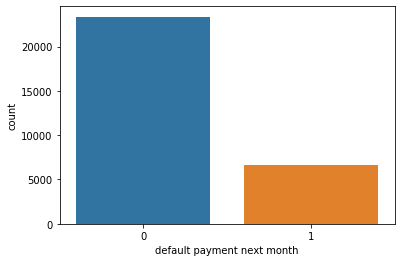

In [6]:
sns.countplot(data1['default payment next month'],label="Count")
plt.show()

#### On remarque un desequilbre entre les classes(Yes(1), No(0))

In [7]:
23364/(23364+6636)

0.7788

#### Diviser les données en données d'apprentissage et données de test 

In [8]:
y = data1.iloc[:,-1]   # Enregistrer la varialbe target
x = data1.iloc[:,0:-1]; # Enleveer la colonne target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [10]:
# Centrage Réduction avec MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification Algorithms

In [12]:
Models_results=pd.DataFrame()

###  K-Nearest Neighbors

Text(0, 0.5, 'Erreur')

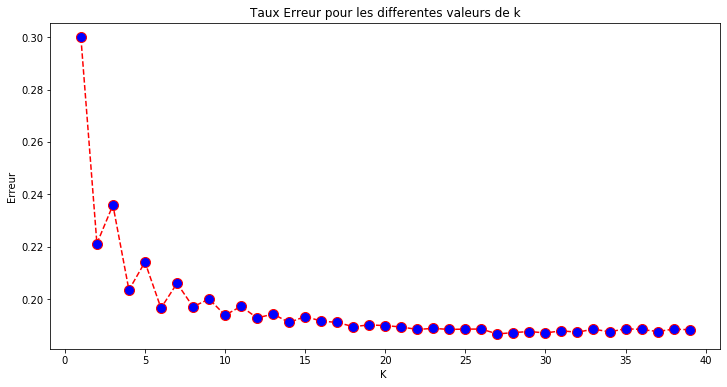

In [13]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [14]:
#Best k is 27

In [15]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    return M

In [16]:
Models_results=K_Nearest_Neighbors(Models_results,27)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform') 

[[5489  343]
 [1057  611]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.64      0.37      0.47      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500

Accuracy of KNN classifier on training set: 0.82
Accuracy of KNN classifier on test set: 0.81


### CART

In [17]:
def Cart(Models_results):
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    dtc_model=dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
    print(dtc_model,'\n')
    print(confusion_matrix(y_test, y_pred_dtc))
    print(classification_report(y_test,y_pred_dtc))
    roc=roc_auc_score(y_test, y_pred_dtc)
    acc = accuracy_score(y_test,y_pred_dtc)
    prec = precision_score(y_test, y_pred_dtc)
    rec = recall_score(y_test,y_pred_dtc)
    f1 = f1_score(y_test, y_pred_dtc)
    model =  pd.DataFrame([['Classification and Regression Trees', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of CART classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of CART classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    return M

In [18]:
Models_results=Cart(Models_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

[[4367 1465]
 [ 948  720]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      5832
           1       0.33      0.43      0.37      1668

    accuracy                           0.68      7500
   macro avg       0.58      0.59      0.58      7500
weighted avg       0.71      0.68      0.69      7500

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.68


### Random Forest

In [19]:
def Random_Forest(Models_results):    
    rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state=0)
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    print(rfc_model,'\n')
    print(confusion_matrix(y_test, y_pred_rfc))
    print(classification_report(y_test,y_pred_rfc))
    roc=roc_auc_score(y_test,y_pred_rfc)
    acc = accuracy_score(y_test,y_pred_rfc)
    prec = precision_score(y_test, y_pred_rfc)
    rec = recall_score(y_test,y_pred_rfc)
    f1 = f1_score(y_test,y_pred_rfc)
    model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
    return M

In [20]:
Models_results=Random_Forest(Models_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) 

[[5608  224]
 [1257  411]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5832
           1       0.65      0.25      0.36      1668

    accuracy                           0.80      7500
   macro avg       0.73      0.60      0.62      7500
weighted avg       0.78      0.80      0.77      7500

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.80


### Stochastic Gradient descent

In [21]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier()
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    return M

In [22]:
Models_results=Stochastic_Gradient_Descent(Models_results)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 

[[5668  164]
 [1272  396]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5832
           1       0.71      0.24      0.36      1668

    accuracy                           0.81      7500
   macro avg       0.76      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Accuracy of Stochastic Gradient Descent classifier on training set: 0.81
Accuracy of Stochastic Gradient Descent classifier on test set: 0.81


### SVM

In [23]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    return M

In [24]:
Models_results=Support_Vector_Machine(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

[[5723  109]
 [1396  272]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5832
           1       0.71      0.16      0.27      1668

    accuracy                           0.80      7500
   macro avg       0.76      0.57      0.57      7500
weighted avg       0.78      0.80      0.75      7500

Accuracy of Support Vector Machine classifier on training set: 0.79
Accuracy of Support Vector Machine classifier on test set: 0.80


#### Catboost

In [25]:
def Catboost(Models_results):    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    return M

In [26]:
Models_results=Catboost(Models_results)

Learning rate set to 0.108201
0:	learn: 0.8204000	test: 0.8082667	best: 0.8082667 (0)	total: 115ms	remaining: 1m 55s
1:	learn: 0.8209778	test: 0.8004000	best: 0.8082667 (0)	total: 174ms	remaining: 1m 27s
2:	learn: 0.8208000	test: 0.8033333	best: 0.8082667 (0)	total: 237ms	remaining: 1m 18s
3:	learn: 0.8209778	test: 0.8026667	best: 0.8082667 (0)	total: 293ms	remaining: 1m 13s
4:	learn: 0.8208889	test: 0.8086667	best: 0.8086667 (4)	total: 370ms	remaining: 1m 13s
5:	learn: 0.8215111	test: 0.8096000	best: 0.8096000 (5)	total: 426ms	remaining: 1m 10s
6:	learn: 0.8214222	test: 0.8118667	best: 0.8118667 (6)	total: 489ms	remaining: 1m 9s
7:	learn: 0.8212889	test: 0.8134667	best: 0.8134667 (7)	total: 544ms	remaining: 1m 7s
8:	learn: 0.8213778	test: 0.8117333	best: 0.8134667 (7)	total: 597ms	remaining: 1m 5s
9:	learn: 0.8217333	test: 0.8118667	best: 0.8134667 (7)	total: 655ms	remaining: 1m 4s
10:	learn: 0.8214222	test: 0.8140000	best: 0.8140000 (10)	total: 721ms	remaining: 1m 4s
11:	learn: 0.821

96:	learn: 0.8274667	test: 0.8068000	best: 0.8162667 (14)	total: 5.59s	remaining: 52.1s
97:	learn: 0.8275556	test: 0.8057333	best: 0.8162667 (14)	total: 5.65s	remaining: 52s
98:	learn: 0.8276000	test: 0.8062667	best: 0.8162667 (14)	total: 5.68s	remaining: 51.7s
99:	learn: 0.8275556	test: 0.8061333	best: 0.8162667 (14)	total: 5.73s	remaining: 51.6s
100:	learn: 0.8275111	test: 0.8068000	best: 0.8162667 (14)	total: 5.78s	remaining: 51.5s
101:	learn: 0.8276000	test: 0.8062667	best: 0.8162667 (14)	total: 5.84s	remaining: 51.5s
102:	learn: 0.8279111	test: 0.8060000	best: 0.8162667 (14)	total: 5.9s	remaining: 51.4s
103:	learn: 0.8277333	test: 0.8058667	best: 0.8162667 (14)	total: 5.95s	remaining: 51.3s
104:	learn: 0.8277333	test: 0.8058667	best: 0.8162667 (14)	total: 5.98s	remaining: 51s
105:	learn: 0.8277333	test: 0.8060000	best: 0.8162667 (14)	total: 6.04s	remaining: 51s
106:	learn: 0.8277333	test: 0.8060000	best: 0.8162667 (14)	total: 6.07s	remaining: 50.7s
107:	learn: 0.8277778	test: 0.80

190:	learn: 0.8307556	test: 0.7998667	best: 0.8162667 (14)	total: 10.6s	remaining: 44.7s
191:	learn: 0.8308000	test: 0.8002667	best: 0.8162667 (14)	total: 10.6s	remaining: 44.8s
192:	learn: 0.8308000	test: 0.8002667	best: 0.8162667 (14)	total: 10.7s	remaining: 44.6s
193:	learn: 0.8308444	test: 0.8002667	best: 0.8162667 (14)	total: 10.7s	remaining: 44.6s
194:	learn: 0.8308000	test: 0.7998667	best: 0.8162667 (14)	total: 10.8s	remaining: 44.6s
195:	learn: 0.8308444	test: 0.7998667	best: 0.8162667 (14)	total: 10.9s	remaining: 44.6s
196:	learn: 0.8308889	test: 0.7998667	best: 0.8162667 (14)	total: 10.9s	remaining: 44.6s
197:	learn: 0.8309333	test: 0.7982667	best: 0.8162667 (14)	total: 11s	remaining: 44.6s
198:	learn: 0.8308000	test: 0.7989333	best: 0.8162667 (14)	total: 11.1s	remaining: 44.6s
199:	learn: 0.8308889	test: 0.7986667	best: 0.8162667 (14)	total: 11.1s	remaining: 44.5s
200:	learn: 0.8308444	test: 0.7980000	best: 0.8162667 (14)	total: 11.2s	remaining: 44.5s
201:	learn: 0.8307556	t

286:	learn: 0.8336444	test: 0.7933333	best: 0.8162667 (14)	total: 16s	remaining: 39.8s
287:	learn: 0.8337778	test: 0.7897333	best: 0.8162667 (14)	total: 16.1s	remaining: 39.7s
288:	learn: 0.8338667	test: 0.7897333	best: 0.8162667 (14)	total: 16.1s	remaining: 39.6s
289:	learn: 0.8336889	test: 0.7897333	best: 0.8162667 (14)	total: 16.1s	remaining: 39.5s
290:	learn: 0.8336889	test: 0.7897333	best: 0.8162667 (14)	total: 16.2s	remaining: 39.4s
291:	learn: 0.8336889	test: 0.7897333	best: 0.8162667 (14)	total: 16.2s	remaining: 39.3s
292:	learn: 0.8337333	test: 0.7897333	best: 0.8162667 (14)	total: 16.3s	remaining: 39.2s
293:	learn: 0.8337333	test: 0.7897333	best: 0.8162667 (14)	total: 16.3s	remaining: 39.1s
294:	learn: 0.8337333	test: 0.7897333	best: 0.8162667 (14)	total: 16.3s	remaining: 39s
295:	learn: 0.8336000	test: 0.7892000	best: 0.8162667 (14)	total: 16.4s	remaining: 39s
296:	learn: 0.8336000	test: 0.7890667	best: 0.8162667 (14)	total: 16.4s	remaining: 38.8s
297:	learn: 0.8336000	test:

381:	learn: 0.8346667	test: 0.7882667	best: 0.8162667 (14)	total: 20.6s	remaining: 33.3s
382:	learn: 0.8346667	test: 0.7882667	best: 0.8162667 (14)	total: 20.6s	remaining: 33.2s
383:	learn: 0.8345778	test: 0.7882667	best: 0.8162667 (14)	total: 20.7s	remaining: 33.2s
384:	learn: 0.8345778	test: 0.7878667	best: 0.8162667 (14)	total: 20.7s	remaining: 33.1s
385:	learn: 0.8347111	test: 0.7880000	best: 0.8162667 (14)	total: 20.8s	remaining: 33s
386:	learn: 0.8347111	test: 0.7881333	best: 0.8162667 (14)	total: 20.8s	remaining: 33s
387:	learn: 0.8347556	test: 0.7881333	best: 0.8162667 (14)	total: 20.9s	remaining: 32.9s
388:	learn: 0.8347556	test: 0.7881333	best: 0.8162667 (14)	total: 20.9s	remaining: 32.8s
389:	learn: 0.8346667	test: 0.7881333	best: 0.8162667 (14)	total: 21s	remaining: 32.8s
390:	learn: 0.8346222	test: 0.7881333	best: 0.8162667 (14)	total: 21s	remaining: 32.7s
391:	learn: 0.8347111	test: 0.7881333	best: 0.8162667 (14)	total: 21.1s	remaining: 32.7s
392:	learn: 0.8347556	test: 0

475:	learn: 0.8356444	test: 0.7862667	best: 0.8162667 (14)	total: 25.3s	remaining: 27.8s
476:	learn: 0.8356444	test: 0.7864000	best: 0.8162667 (14)	total: 25.3s	remaining: 27.8s
477:	learn: 0.8359556	test: 0.7865333	best: 0.8162667 (14)	total: 25.4s	remaining: 27.7s
478:	learn: 0.8360000	test: 0.7865333	best: 0.8162667 (14)	total: 25.4s	remaining: 27.7s
479:	learn: 0.8357778	test: 0.7860000	best: 0.8162667 (14)	total: 25.5s	remaining: 27.6s
480:	learn: 0.8358222	test: 0.7860000	best: 0.8162667 (14)	total: 25.5s	remaining: 27.5s
481:	learn: 0.8360444	test: 0.7852000	best: 0.8162667 (14)	total: 25.6s	remaining: 27.5s
482:	learn: 0.8362222	test: 0.7849333	best: 0.8162667 (14)	total: 25.6s	remaining: 27.4s
483:	learn: 0.8363556	test: 0.7850667	best: 0.8162667 (14)	total: 25.7s	remaining: 27.4s
484:	learn: 0.8363556	test: 0.7852000	best: 0.8162667 (14)	total: 25.7s	remaining: 27.3s
485:	learn: 0.8363111	test: 0.7852000	best: 0.8162667 (14)	total: 25.8s	remaining: 27.3s
486:	learn: 0.8363556

570:	learn: 0.8380000	test: 0.7870667	best: 0.8162667 (14)	total: 30s	remaining: 22.5s
571:	learn: 0.8380889	test: 0.7870667	best: 0.8162667 (14)	total: 30s	remaining: 22.5s
572:	learn: 0.8378667	test: 0.7870667	best: 0.8162667 (14)	total: 30.1s	remaining: 22.4s
573:	learn: 0.8379556	test: 0.7880000	best: 0.8162667 (14)	total: 30.1s	remaining: 22.4s
574:	learn: 0.8379111	test: 0.7880000	best: 0.8162667 (14)	total: 30.2s	remaining: 22.3s
575:	learn: 0.8379111	test: 0.7880000	best: 0.8162667 (14)	total: 30.3s	remaining: 22.3s
576:	learn: 0.8379111	test: 0.7880000	best: 0.8162667 (14)	total: 30.3s	remaining: 22.2s
577:	learn: 0.8379111	test: 0.7881333	best: 0.8162667 (14)	total: 30.4s	remaining: 22.2s
578:	learn: 0.8378667	test: 0.7880000	best: 0.8162667 (14)	total: 30.4s	remaining: 22.1s
579:	learn: 0.8377778	test: 0.7878667	best: 0.8162667 (14)	total: 30.5s	remaining: 22.1s
580:	learn: 0.8378667	test: 0.7874667	best: 0.8162667 (14)	total: 30.6s	remaining: 22s
581:	learn: 0.8379556	test:

663:	learn: 0.8387556	test: 0.7862667	best: 0.8162667 (14)	total: 34.8s	remaining: 17.6s
664:	learn: 0.8387556	test: 0.7862667	best: 0.8162667 (14)	total: 34.9s	remaining: 17.6s
665:	learn: 0.8387556	test: 0.7862667	best: 0.8162667 (14)	total: 34.9s	remaining: 17.5s
666:	learn: 0.8387111	test: 0.7864000	best: 0.8162667 (14)	total: 35s	remaining: 17.5s
667:	learn: 0.8387556	test: 0.7864000	best: 0.8162667 (14)	total: 35s	remaining: 17.4s
668:	learn: 0.8387556	test: 0.7869333	best: 0.8162667 (14)	total: 35.1s	remaining: 17.3s
669:	learn: 0.8387556	test: 0.7869333	best: 0.8162667 (14)	total: 35.1s	remaining: 17.3s
670:	learn: 0.8387556	test: 0.7869333	best: 0.8162667 (14)	total: 35.1s	remaining: 17.2s
671:	learn: 0.8386667	test: 0.7870667	best: 0.8162667 (14)	total: 35.2s	remaining: 17.2s
672:	learn: 0.8387111	test: 0.7869333	best: 0.8162667 (14)	total: 35.2s	remaining: 17.1s
673:	learn: 0.8387111	test: 0.7869333	best: 0.8162667 (14)	total: 35.3s	remaining: 17.1s
674:	learn: 0.8387111	tes

758:	learn: 0.8395556	test: 0.7849333	best: 0.8162667 (14)	total: 39.8s	remaining: 12.6s
759:	learn: 0.8395556	test: 0.7848000	best: 0.8162667 (14)	total: 39.8s	remaining: 12.6s
760:	learn: 0.8395111	test: 0.7849333	best: 0.8162667 (14)	total: 39.9s	remaining: 12.5s
761:	learn: 0.8394222	test: 0.7849333	best: 0.8162667 (14)	total: 40s	remaining: 12.5s
762:	learn: 0.8395111	test: 0.7849333	best: 0.8162667 (14)	total: 40s	remaining: 12.4s
763:	learn: 0.8395111	test: 0.7849333	best: 0.8162667 (14)	total: 40.1s	remaining: 12.4s
764:	learn: 0.8395556	test: 0.7848000	best: 0.8162667 (14)	total: 40.1s	remaining: 12.3s
765:	learn: 0.8396000	test: 0.7848000	best: 0.8162667 (14)	total: 40.2s	remaining: 12.3s
766:	learn: 0.8395556	test: 0.7848000	best: 0.8162667 (14)	total: 40.2s	remaining: 12.2s
767:	learn: 0.8396444	test: 0.7849333	best: 0.8162667 (14)	total: 40.3s	remaining: 12.2s
768:	learn: 0.8396444	test: 0.7849333	best: 0.8162667 (14)	total: 40.3s	remaining: 12.1s
769:	learn: 0.8396444	tes

851:	learn: 0.8403111	test: 0.7860000	best: 0.8162667 (14)	total: 44.5s	remaining: 7.72s
852:	learn: 0.8403556	test: 0.7860000	best: 0.8162667 (14)	total: 44.5s	remaining: 7.67s
853:	learn: 0.8403556	test: 0.7860000	best: 0.8162667 (14)	total: 44.6s	remaining: 7.62s
854:	learn: 0.8403556	test: 0.7858667	best: 0.8162667 (14)	total: 44.6s	remaining: 7.57s
855:	learn: 0.8403111	test: 0.7860000	best: 0.8162667 (14)	total: 44.7s	remaining: 7.51s
856:	learn: 0.8403556	test: 0.7861333	best: 0.8162667 (14)	total: 44.7s	remaining: 7.47s
857:	learn: 0.8403556	test: 0.7862667	best: 0.8162667 (14)	total: 44.8s	remaining: 7.42s
858:	learn: 0.8403111	test: 0.7862667	best: 0.8162667 (14)	total: 44.9s	remaining: 7.37s
859:	learn: 0.8403556	test: 0.7862667	best: 0.8162667 (14)	total: 44.9s	remaining: 7.32s
860:	learn: 0.8403556	test: 0.7862667	best: 0.8162667 (14)	total: 45s	remaining: 7.26s
861:	learn: 0.8403556	test: 0.7862667	best: 0.8162667 (14)	total: 45s	remaining: 7.21s
862:	learn: 0.8404000	tes

945:	learn: 0.8412889	test: 0.7869333	best: 0.8162667 (14)	total: 49.2s	remaining: 2.81s
946:	learn: 0.8412889	test: 0.7869333	best: 0.8162667 (14)	total: 49.3s	remaining: 2.76s
947:	learn: 0.8412889	test: 0.7869333	best: 0.8162667 (14)	total: 49.3s	remaining: 2.71s
948:	learn: 0.8413333	test: 0.7865333	best: 0.8162667 (14)	total: 49.4s	remaining: 2.65s
949:	learn: 0.8412444	test: 0.7862667	best: 0.8162667 (14)	total: 49.4s	remaining: 2.6s
950:	learn: 0.8413778	test: 0.7862667	best: 0.8162667 (14)	total: 49.5s	remaining: 2.55s
951:	learn: 0.8413778	test: 0.7862667	best: 0.8162667 (14)	total: 49.5s	remaining: 2.5s
952:	learn: 0.8413778	test: 0.7862667	best: 0.8162667 (14)	total: 49.6s	remaining: 2.44s
953:	learn: 0.8414222	test: 0.7862667	best: 0.8162667 (14)	total: 49.6s	remaining: 2.39s
954:	learn: 0.8414667	test: 0.7864000	best: 0.8162667 (14)	total: 49.7s	remaining: 2.34s
955:	learn: 0.8414667	test: 0.7864000	best: 0.8162667 (14)	total: 49.7s	remaining: 2.29s
956:	learn: 0.8414667	t

#### Logistic Regression

In [27]:
def Logistic_Regression(Models_results):
    log = LogisticRegression()
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    return M

In [28]:
Models_results=Logistic_Regression(Models_results)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5485  347]
 [1050  618]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.64      0.37      0.47      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.66      0.68      7500
weighted avg       0.80      0.81      0.79      7500

Accuracy of Catboost classifier on training set: 0.81
Accuracy of Catboost classifier on test set: 0.81


## Best algorithms

In [29]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.816267,0.713864,0.290168,0.412617,0.628452
6,Logistic_Regression,0.813733,0.640415,0.370504,0.469427,0.655502
0,K Nearest Neighbors,0.813333,0.640461,0.366307,0.466056,0.653747
3,Stochastic Gradient Descent,0.808533,0.707143,0.237410,0.355476,0.604645
2,Random Forest,0.802533,0.647244,0.246403,0.356926,0.603997
4,Support Vector Machine,0.799333,0.713911,0.163070,0.265495,0.572190
1,Classification and Regression Trees,0.678267,0.329519,0.431655,0.373735,0.590227
